In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

cifar10 = tf.keras.datasets.cifar10

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(50000, 1)
(10000, 1)


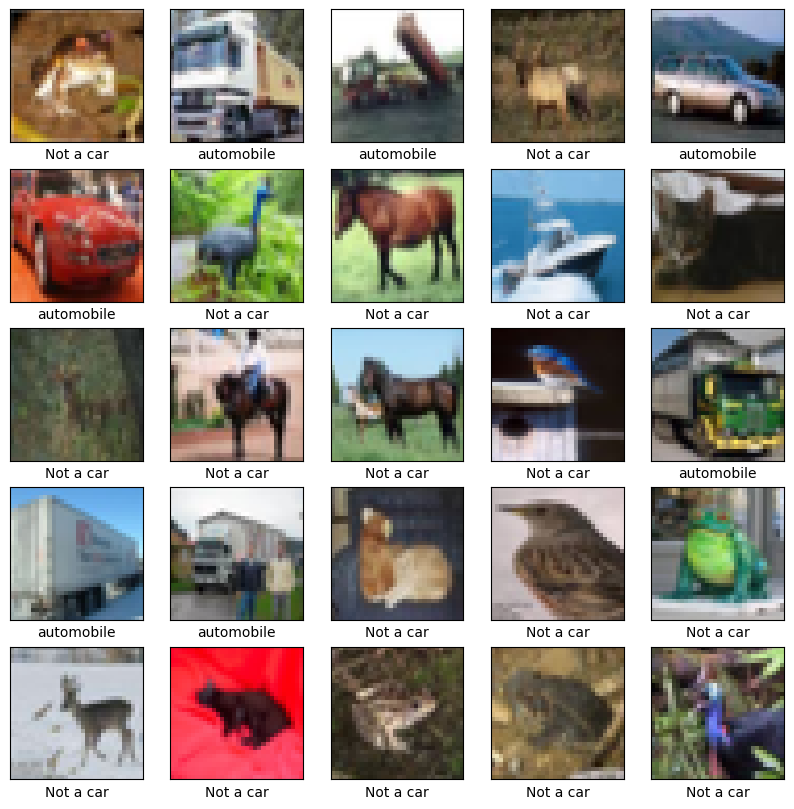

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Label and plot images
''' 
I changed this from the full list to just two:
This GREATLY improves model accuracy
'''
class_names = ['Not a car', 'automobile']

print(y_train.shape)
print(y_test.shape)
# Change data set to only have 2 labels
for i in range(50000):
    if y_train[i][0] not in {1, 9}:
        y_train[i][0] = 0
    else:
        y_train[i][0] = 1
        
for i in range(10000):
    if y_test[i][0] not in {1, 9}:
        y_test[i][0] = 0
    else:
        y_test[i][0] = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [4]:
# Preprocessing: Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Flatten the labels
y_train = y_train.ravel()
y_test = y_test.ravel()

# Normalize pixel values to between 0 and 1
#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255

# Lower the size of the dataset to prevent long training time
# Define the size of the subset
subset_size = 5000  # Adjust this number according to your needs

# Randomly select indices for the subset
subset_indices = np.random.choice(len(x_train), subset_size, replace=False)

# Create the subset
x_train_subset = x_train[subset_indices]
y_train_subset = y_train[subset_indices]



In [5]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [6]:
#Define the model to be used for the SVC
Lin_Model = SVC(probability = False, kernel = 'linear', C = 0.1)
Pol_Model = SVC(probability=False, kernel = 'poly', C = 0.1)
Rbf_Model = SVC(probability=False, kernel = 'rbf', C = 0.1, gamma = 1)

In [7]:
Pol_Model.fit(x_train_subset, y_train_subset)

SVC(C=0.1, kernel='poly')

In [8]:
# Predict the labels for test set
y_pred = Pol_Model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8647
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8000
           1       0.75      0.48      0.59      2000

    accuracy                           0.86     10000
   macro avg       0.82      0.72      0.75     10000
weighted avg       0.86      0.86      0.85     10000



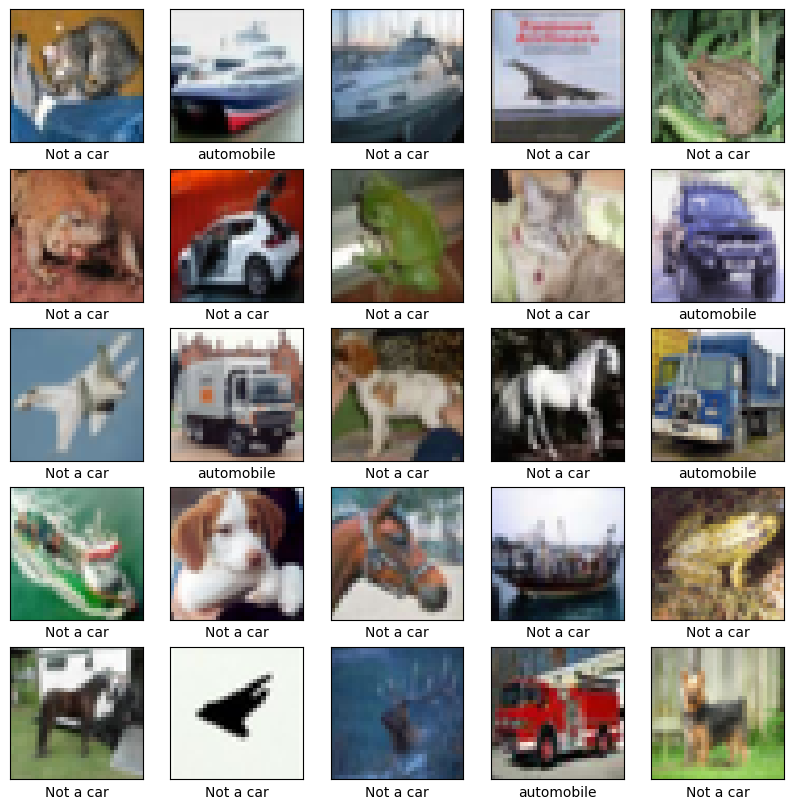

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[y_pred[i]])  # Use predicted labels
plt.show()
